***Training: What We Do After The Forward Pass***


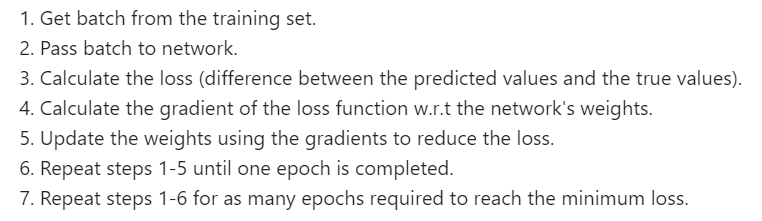

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision as torchv

In [2]:
train_ds = torchv.datasets.FashionMNIST(
    root = '/content',
    download = True,
    train = True,
    transform = transforms.Compose([
          transforms.ToTensor()
    ])
)


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw




Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(train_ds)

60000

In [4]:
60000/100

600.0

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_ds,batch_size=100)
#batch = next(iter(train_dataloader))
#images,labels = batch

In [6]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
    self.fc2 = nn.Linear(in_features=120,out_features=60)
    self.out = nn.Linear(in_features=60,out_features=10)

  def forward(self,t):
    #1)input same
    t = t

    #2)conv2d 
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t,kernel_size=2,stride=2)

    #3)conv2d 
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t,kernel_size=2,stride=2)

    #4)Flatten 
    t = t.reshape(-1,12*4*4)

    #5)fc1
    t = self.fc1(t)
    t = F.relu(t)

    #6)fc2
    t = self.fc2(t)
    t = F.relu(t)

    #5)output layer
    t = self.out(t)

    return t

In [7]:
net = Network()

In [8]:
optimizer = optim.Adam(net.parameters(),lr=0.01)

In [9]:
batch = next(iter(train_dataloader))
images,labels = batch

# **Calculating Loss**

In [14]:
for x in range(10):

  pred = net(images)
  loss = F.cross_entropy(pred,labels)
  print("loss",loss)
  
  loss.backward()
  optimizer.step()

loss tensor(3.1225, grad_fn=<NllLossBackward>)
loss tensor(3.1277, grad_fn=<NllLossBackward>)
loss tensor(3.1329, grad_fn=<NllLossBackward>)
loss tensor(3.1381, grad_fn=<NllLossBackward>)
loss tensor(3.1432, grad_fn=<NllLossBackward>)
loss tensor(3.1482, grad_fn=<NllLossBackward>)
loss tensor(3.1533, grad_fn=<NllLossBackward>)
loss tensor(3.1583, grad_fn=<NllLossBackward>)
loss tensor(3.1632, grad_fn=<NllLossBackward>)
loss tensor(3.1681, grad_fn=<NllLossBackward>)
